In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Data Cleaning and Preparation

In [2]:
heart = pd.read_csv('Cardiotocographic.csv')
heart.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
heart.info()
# it is clear that there are missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
# column wise null values
heart.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
# Row wise null values
heart.isnull().any(axis=1).sum()

21

In [6]:
# As null rows are less compared to total entities we can remove them
heart.dropna(inplace=True,ignore_index=True)

In [7]:
# verify whether null values are removed successfully
heart.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

skewness of the LB Column = 0.32074705773050133


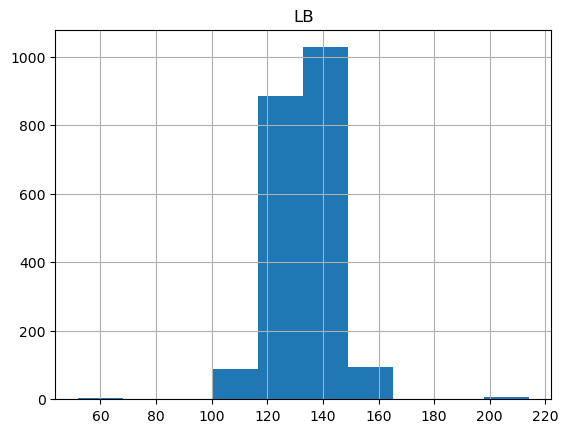

skewness of the AC Column = 1.8648855629415217


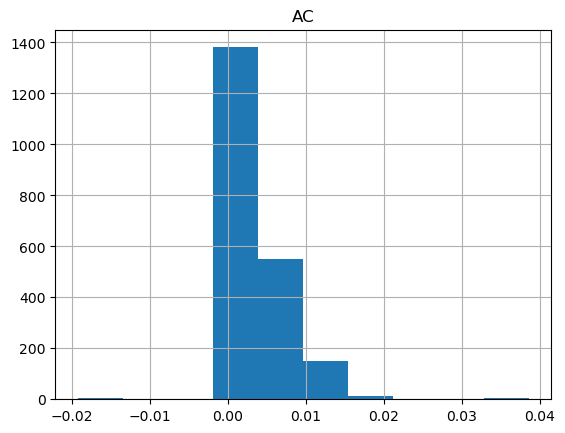

skewness of the FM Column = 6.7183555476041406


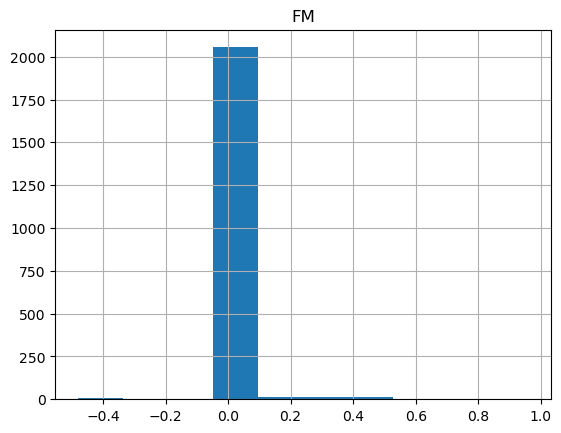

skewness of the UC Column = 0.9773320428036035


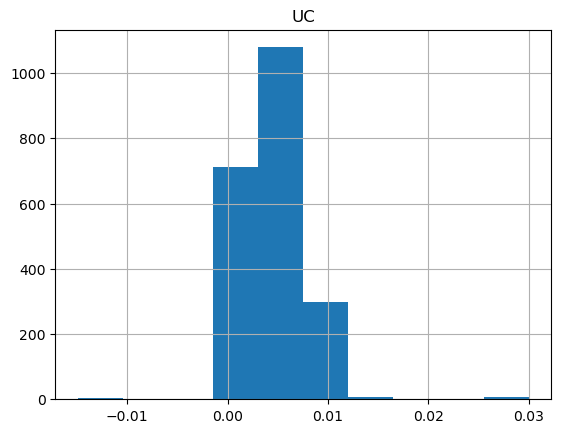

skewness of the DL Column = 2.0119702704876623


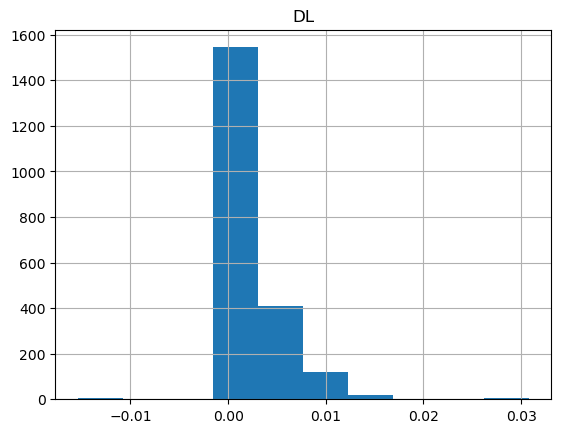

skewness of the DS Column = 8.4189843203872


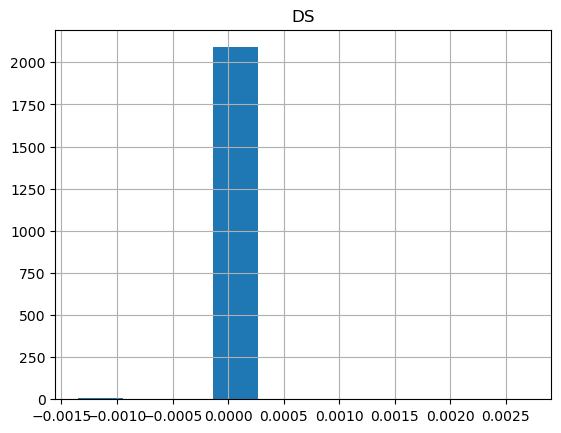

skewness of the DP Column = 6.422466267620808


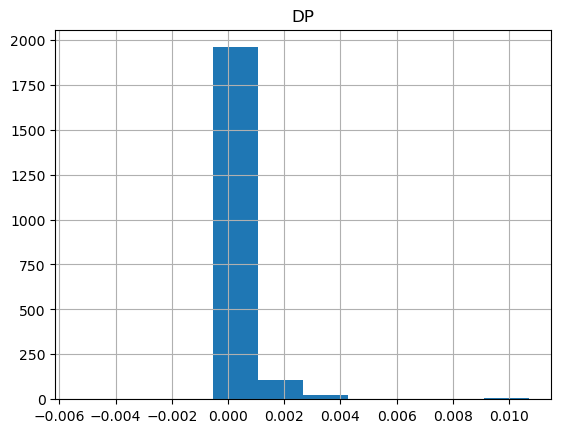

skewness of the ASTV Column = 0.05536993063749096


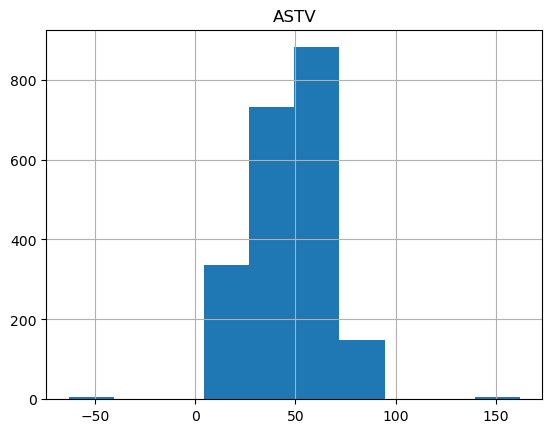

skewness of the MSTV Column = 4.175993693868204


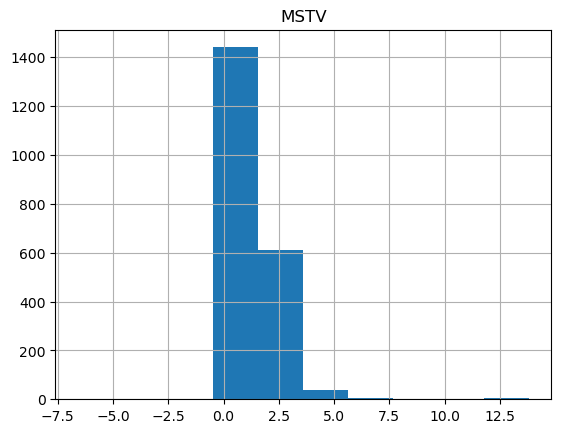

skewness of the ALTV Column = 2.9689496780427325


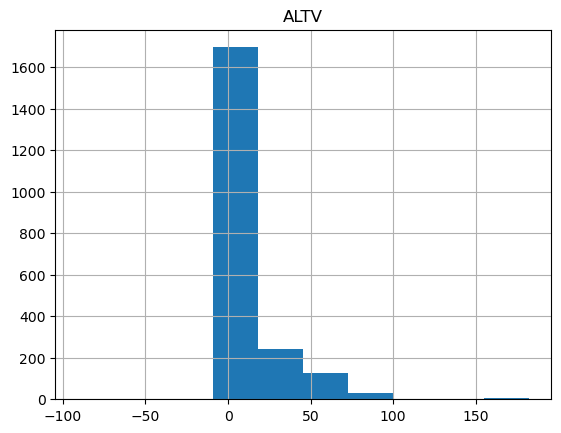

skewness of the MLTV Column = 3.5414480991773547


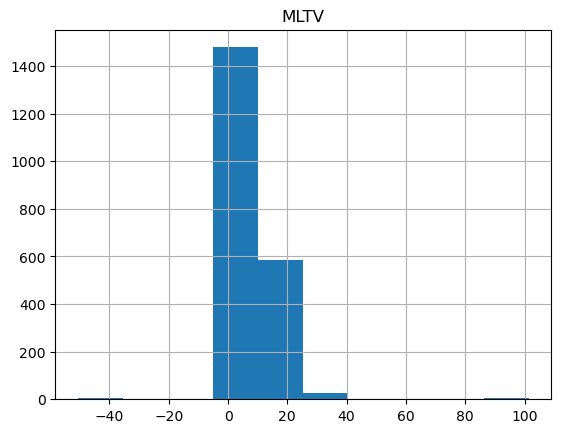

skewness of the Width Column = 0.49524641569876393


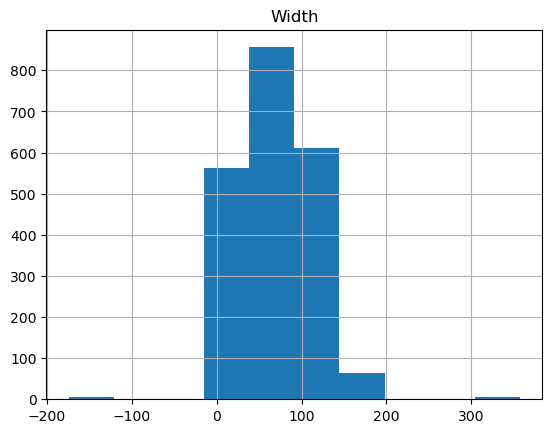

skewness of the Tendency Column = -0.4967885756659502


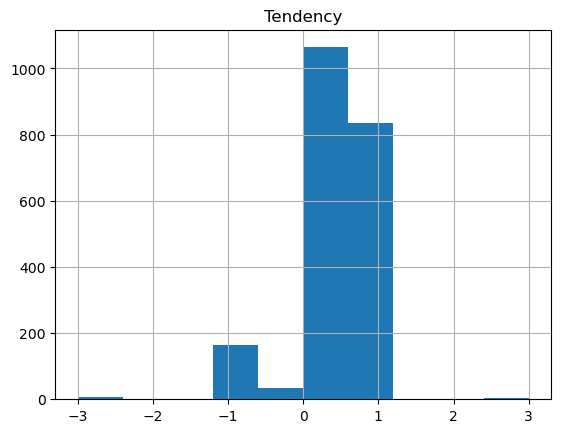

skewness of the NSP Column = 1.8109002963486223


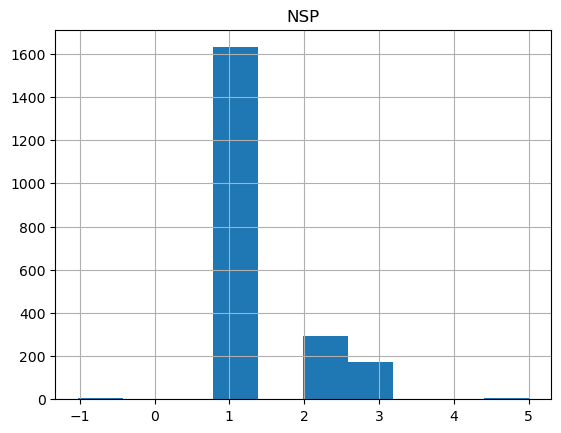

In [8]:
# let see the distribution
for feature in heart.columns :
    print(f"skewness of the {feature} Column = {heart[feature].skew()}")
    heart[feature].hist()
    plt.title(feature)
    plt.show()

In [9]:
# It is clear that due to outliers only we have skewness in data
heart.skew()

LB          0.320747
AC          1.864886
FM          6.718356
UC          0.977332
DL          2.011970
DS          8.418984
DP          6.422466
ASTV        0.055370
MSTV        4.175994
ALTV        2.968950
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64

## Outlier Detection using Boxplot {Univariant}

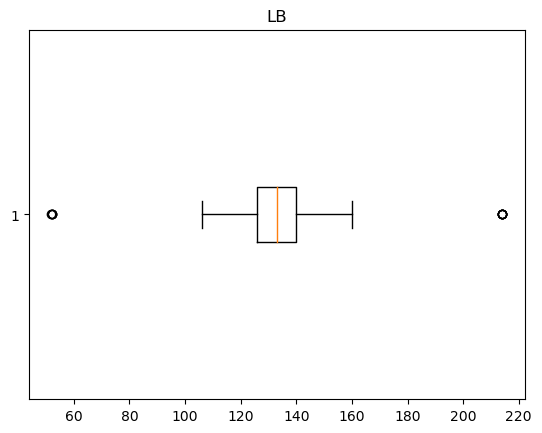

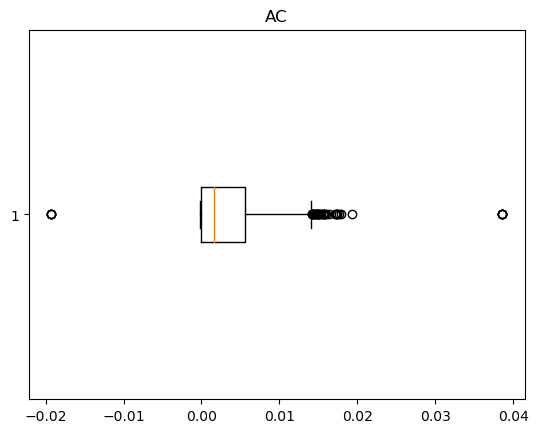

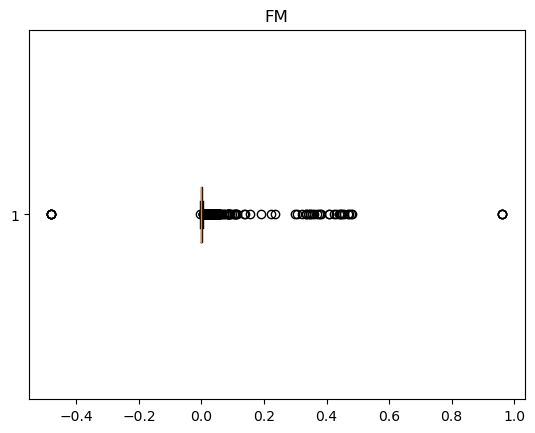

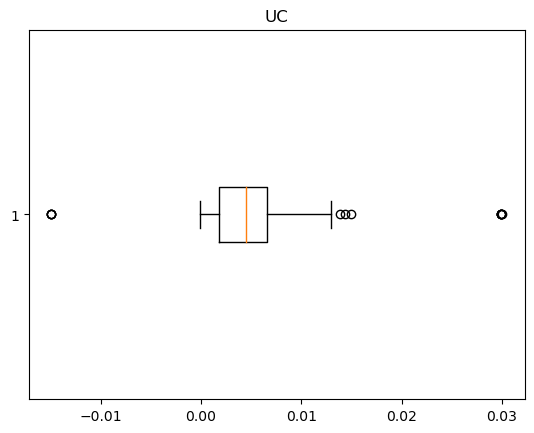

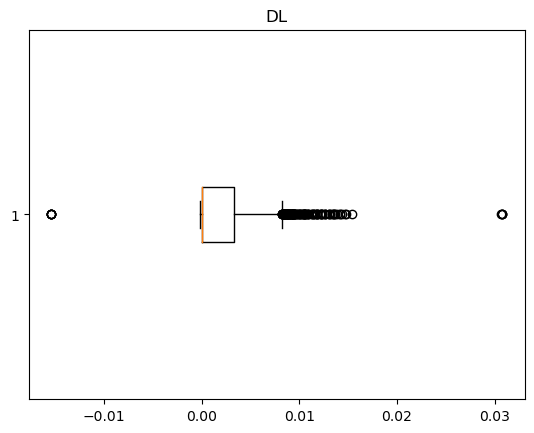

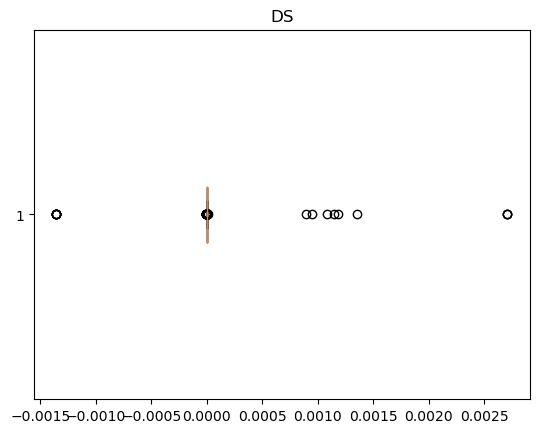

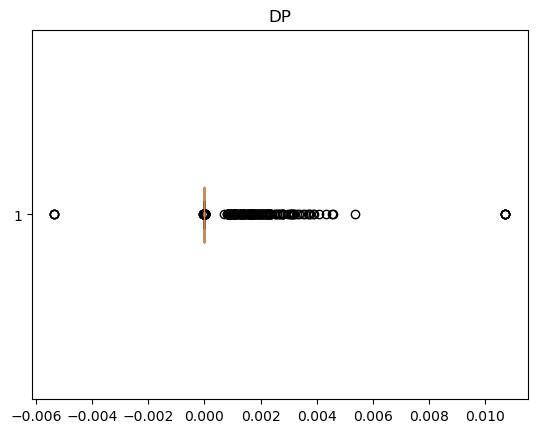

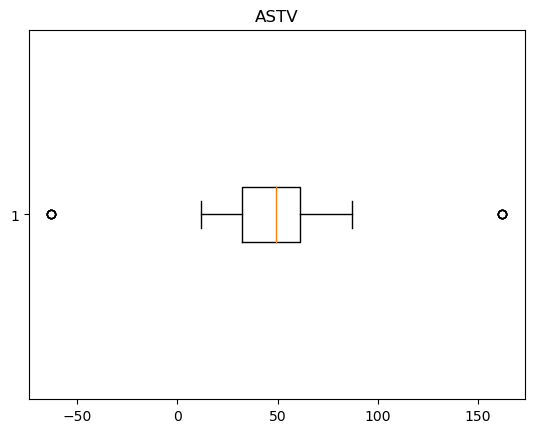

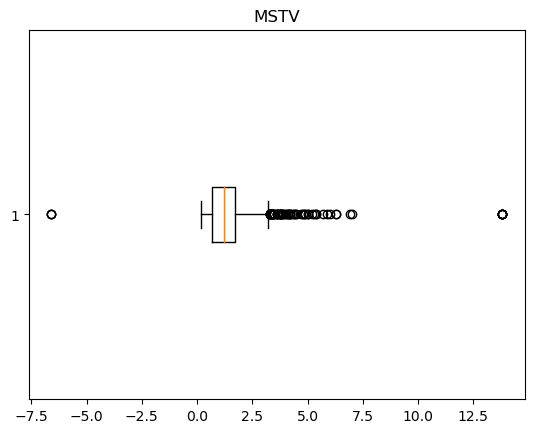

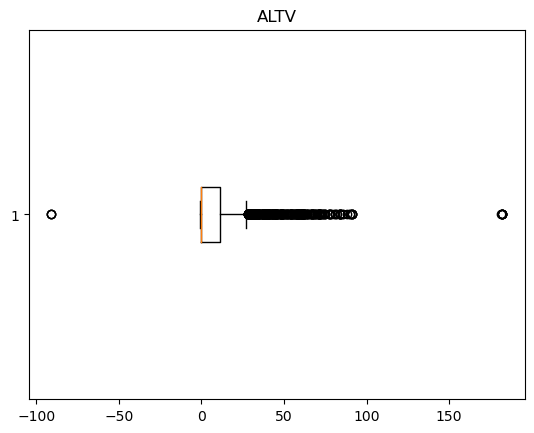

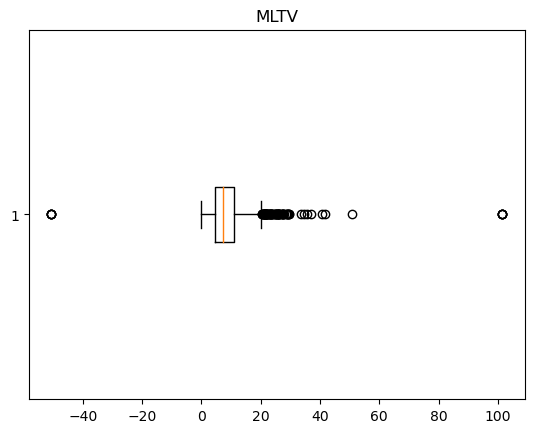

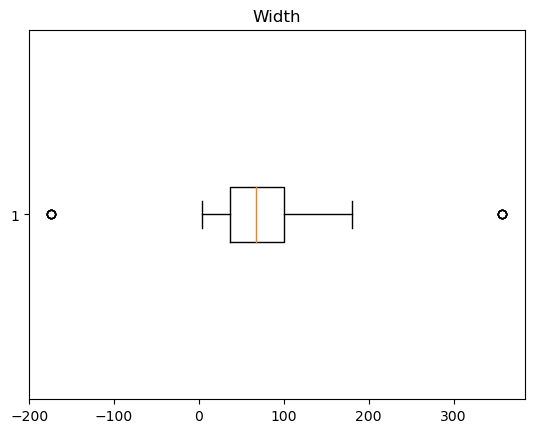

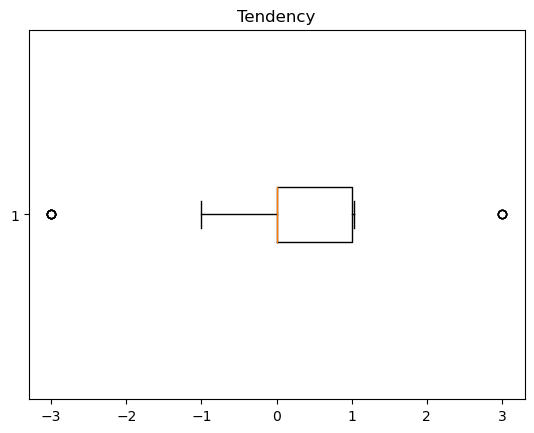

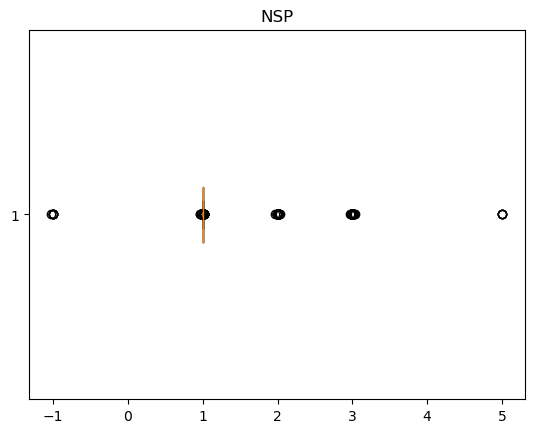

In [10]:
for feature in heart.columns :
    plt.boxplot(heart[feature],vert=False)
    plt.title(feature)
    plt.show()

* Filling outliers with boundry values using Inter Quantile Range method

In [11]:
Heart=heart.copy()
for feature in Heart.columns :
    q1=Heart[feature].quantile(0.25)
    q3=Heart[feature].quantile(0.75)
    IQR=q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    Heart.loc[Heart[feature]<lwr_bound,feature]=lwr_bound
    Heart.loc[Heart[feature]>upr_bound,feature]=upr_bound

<Axes: >

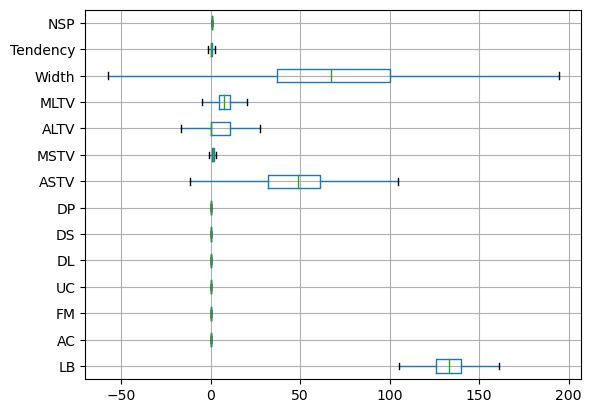

In [12]:
# now there are no outliers
Heart.boxplot(vert=False)

### Correlation 
* there is no significant correlation among features

<Axes: >

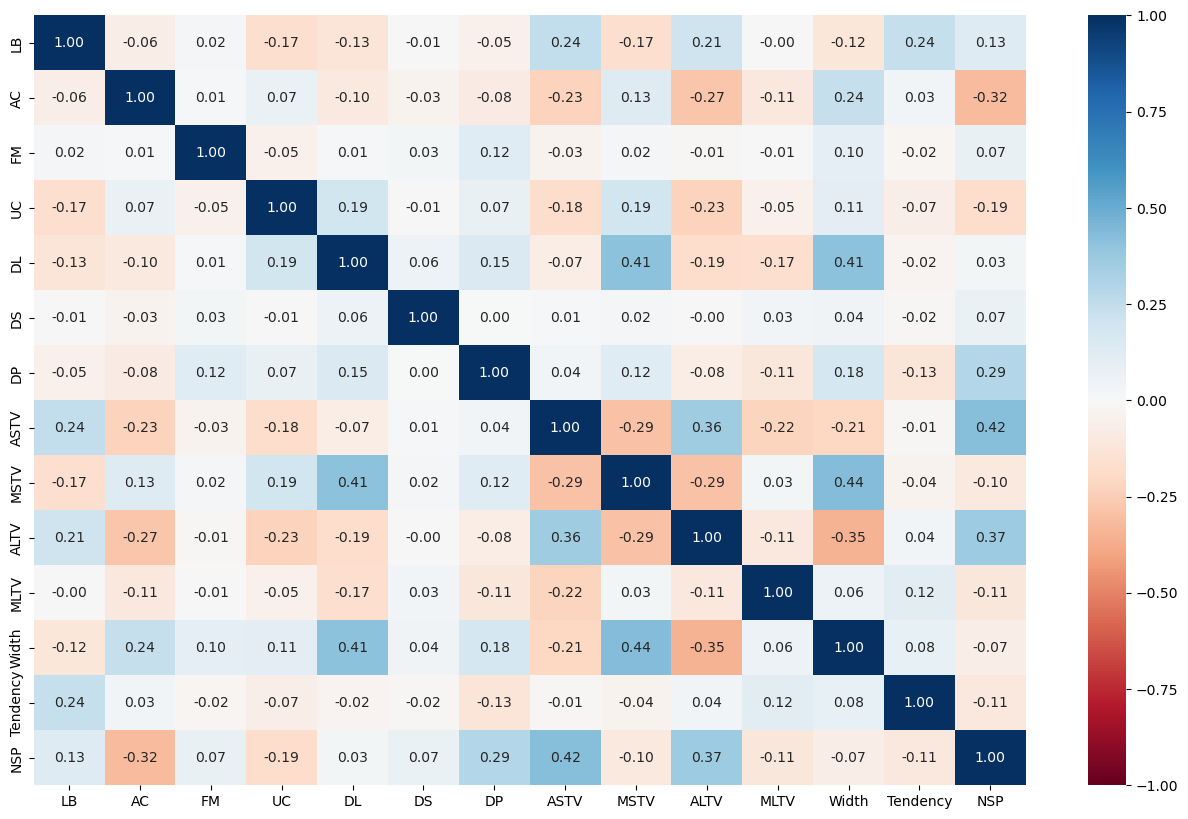

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(heart.iloc[:,:].corr(),fmt='.2f',vmin=-1,vmax=1,cmap='RdBu',annot=True)

In [46]:
rows ,cols = heart.shape
flds = list(heart.columns)
corr = heart.corr().values
for i in range(cols):
    for j in range(i+1,cols):
        if corr[i,j] > 0.4 or  corr[i,j] <- 0.4:
            print (flds[i], ' ', flds[j], ' ', np.round(corr[i,j],decimals=2))

DL   MSTV   0.41
DL   Width   0.41
ASTV   NSP   0.42
MSTV   Width   0.44


## Statistical summary

In [44]:
statistical_summary=heart.describe().T.drop('count',axis=1)

In [45]:
statistical_summary.rename(columns={'25%':'Quartile_1','75%':'Quartile_3','50%':'median'},inplace=True)
statistical_summary['inter_Quartile_range']=statistical_summary.Quartile_3-statistical_summary.Quartile_1
statistical_summary

,mean,std,min,Quartile_1,median,Quartile_3,max,inter_Quartile_range
LB,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000,14.000000
AC,0.003202,0.004324,-0.019284,0.000000,0.001631,0.005650,0.038567,0.005650
FM,0.009963,0.067870,-0.480634,0.000000,0.000000,0.002554,0.961268,0.002554
UC,0.004388,0.003350,-0.014925,0.001838,0.004484,0.006536,0.030002,0.004698
DL,0.001892,0.003348,-0.015393,0.000000,0.000000,0.003289,0.030769,0.003289
DS,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000
DP,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000
ASTV,46.996929,18.847737,-63.000000,32.000000,49.000000,61.000000,162.000000,29.000000
MSTV,1.361006,1.173164,-6.600000,0.700000,1.200000,1.700000,13.800000,1.000000
ALTV,10.353647,21.282102,-91.000000,0.000000,0.000000,11.000000,182.000000,11.000000


In [ ]:
# inter_Quartile_range of the variables
#IQR = heart.quantile(0.75)-heart.quantile(0.25)
#print(f'inter_Quartile_range of the variables{IQR}')
#print(f'standard deveation of variables {heart.std()})

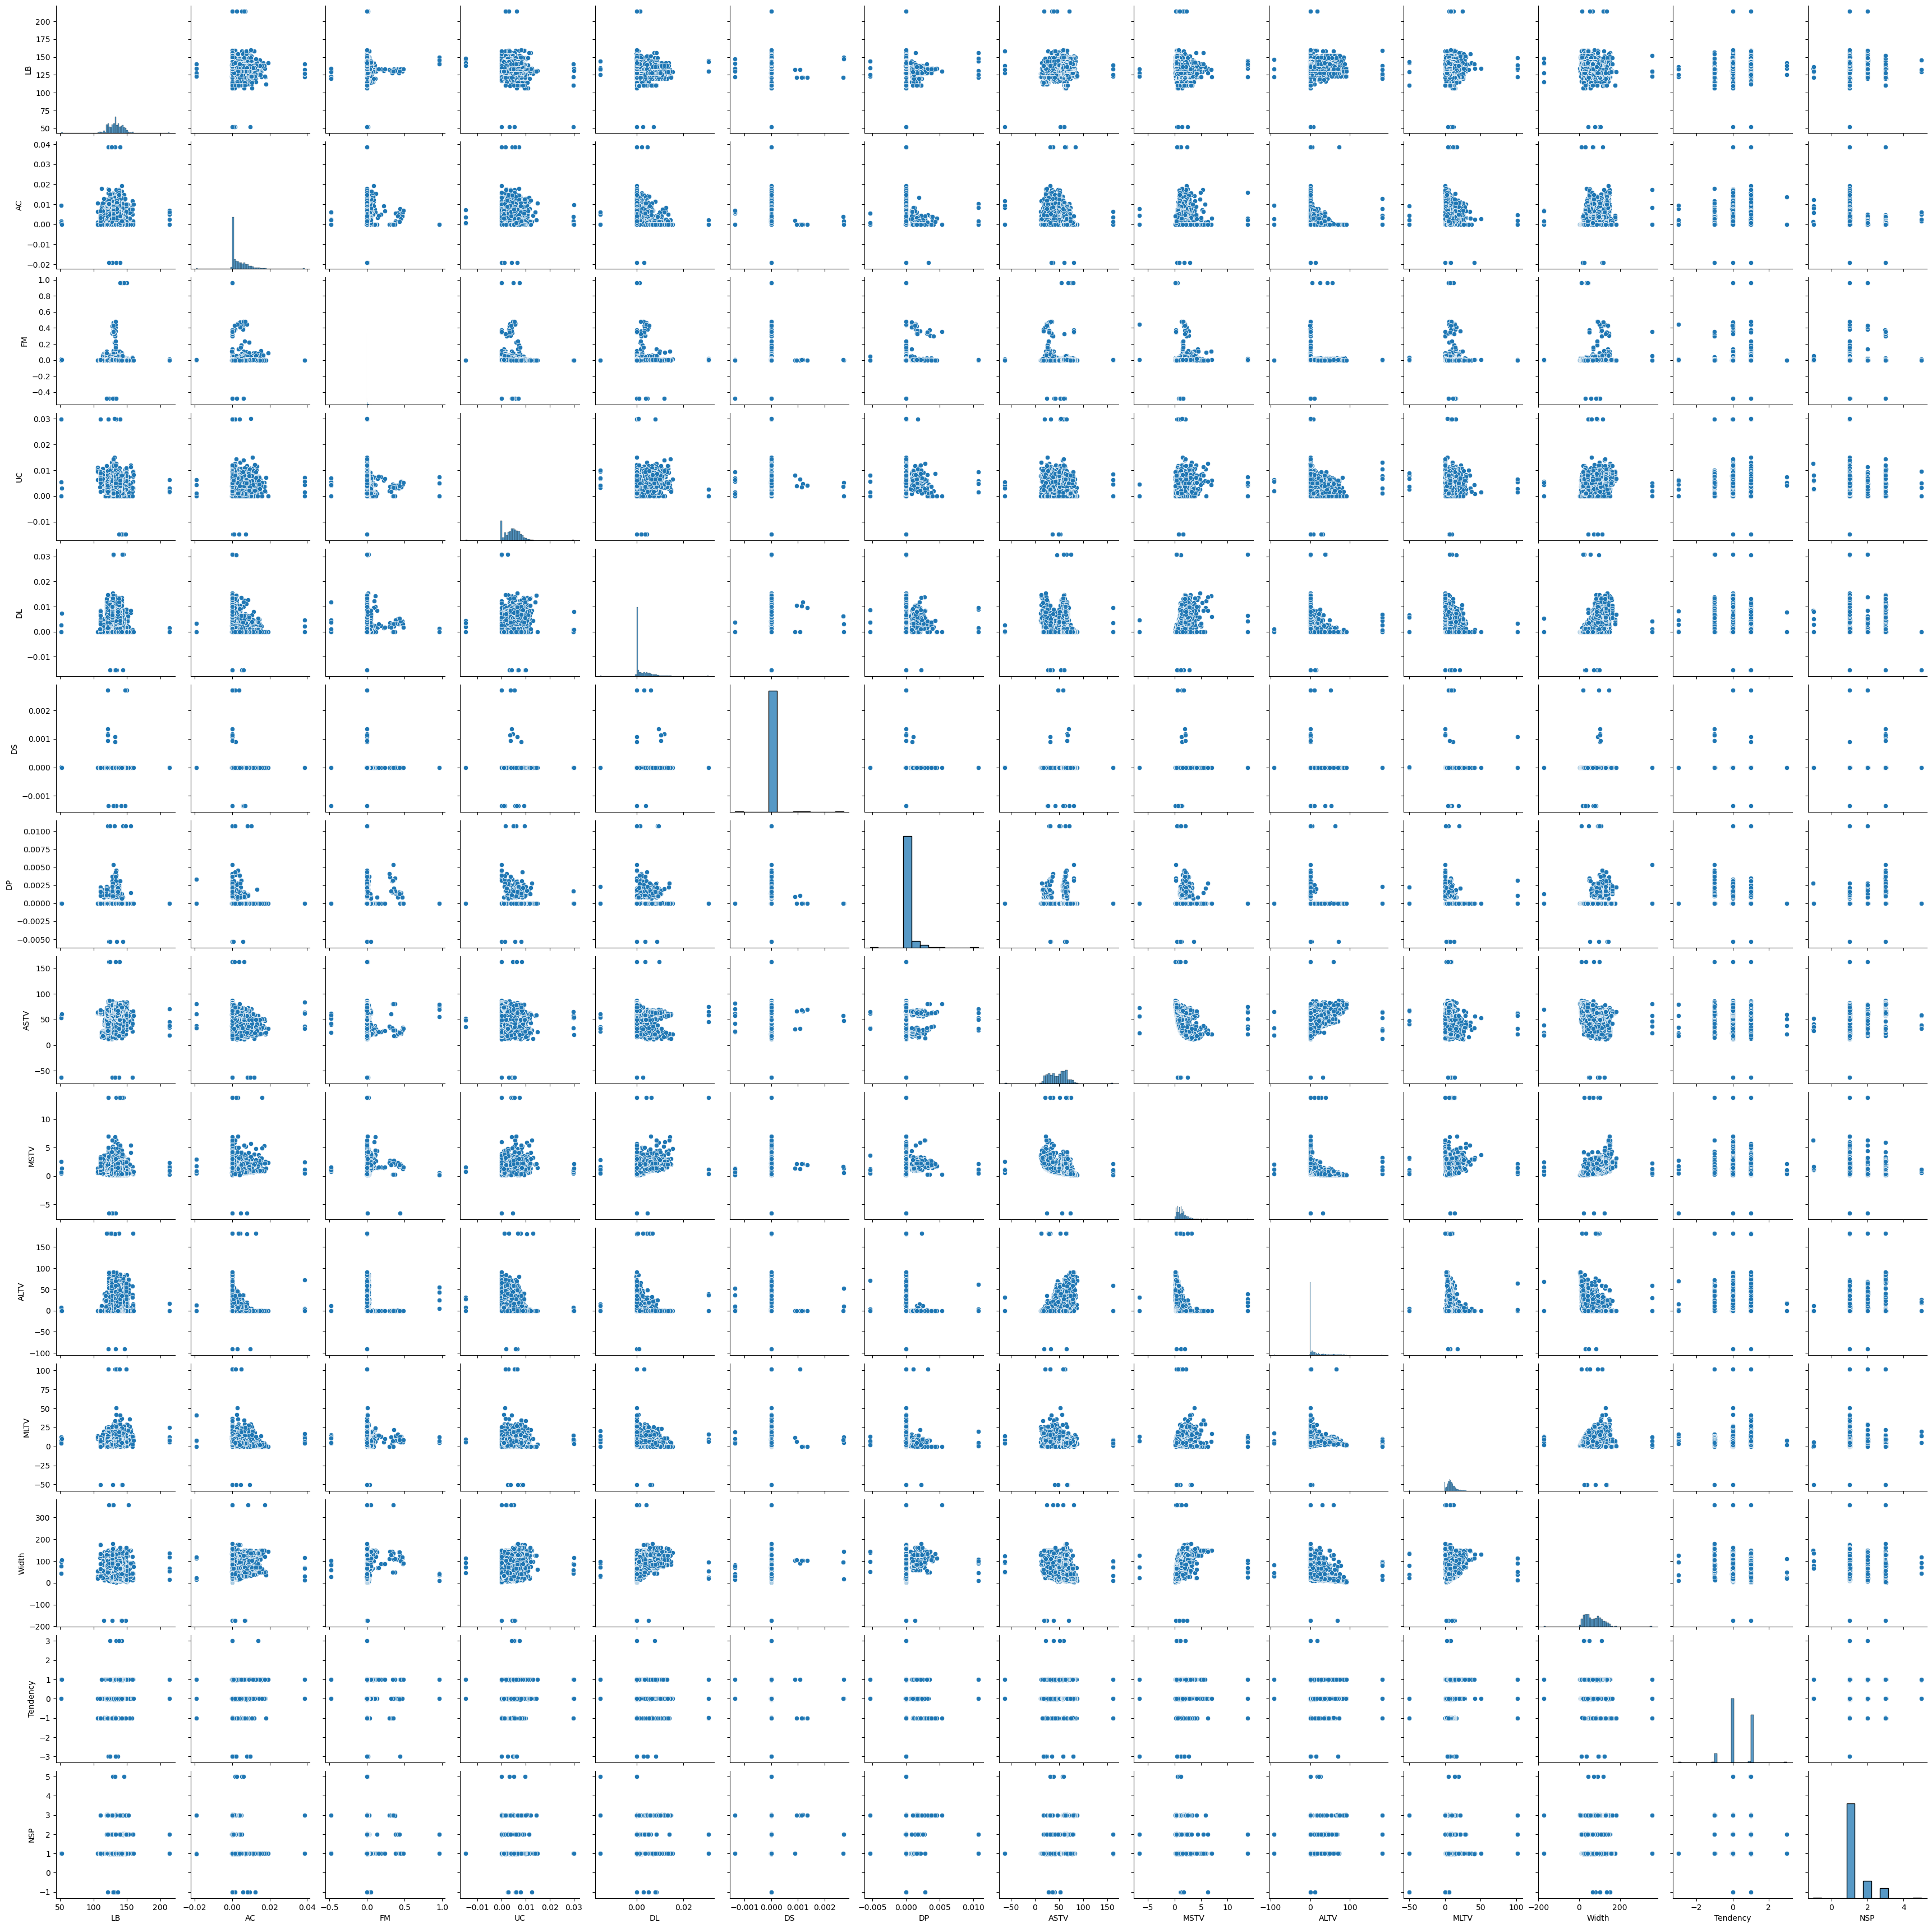

In [22]:
sns.pairplot(heart)

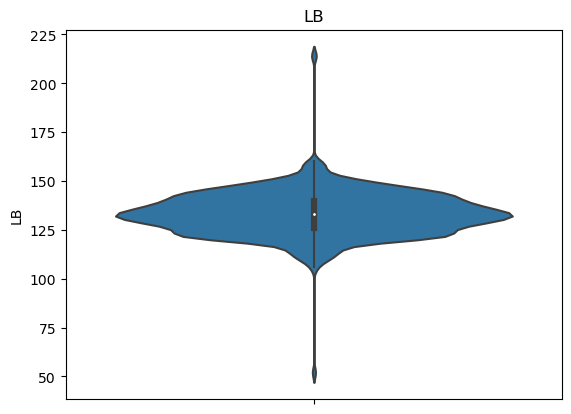

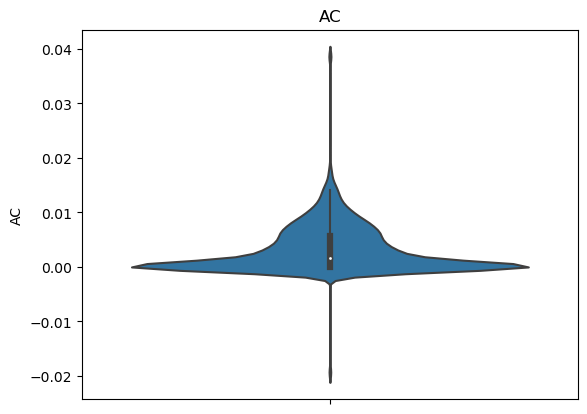

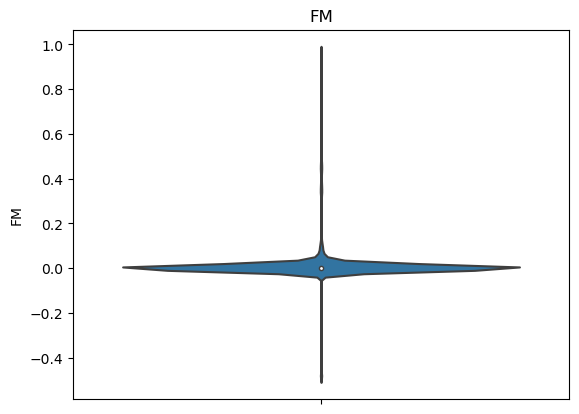

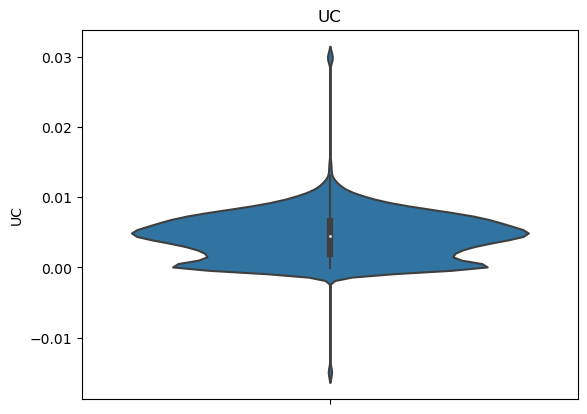

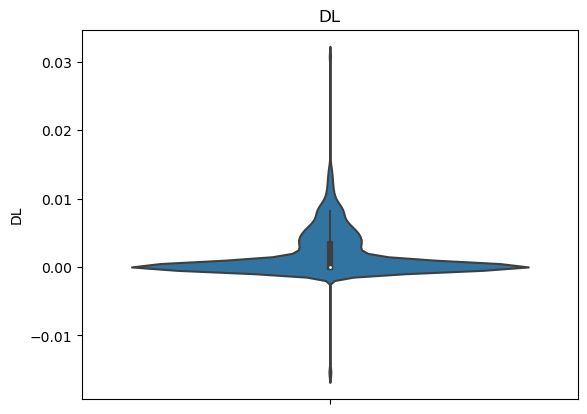

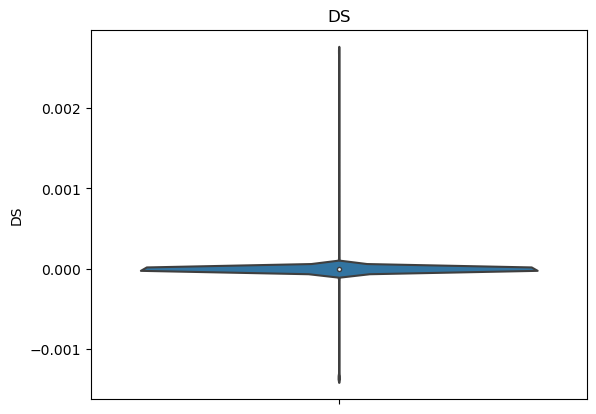

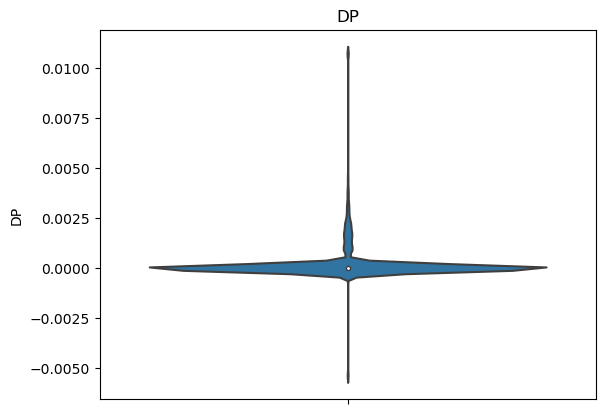

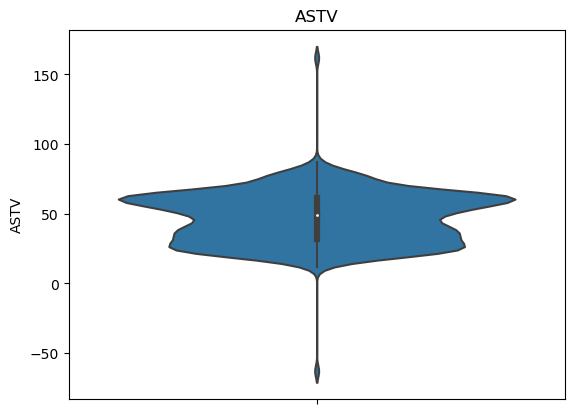

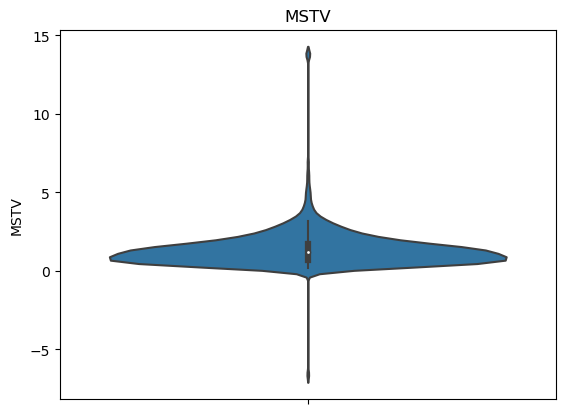

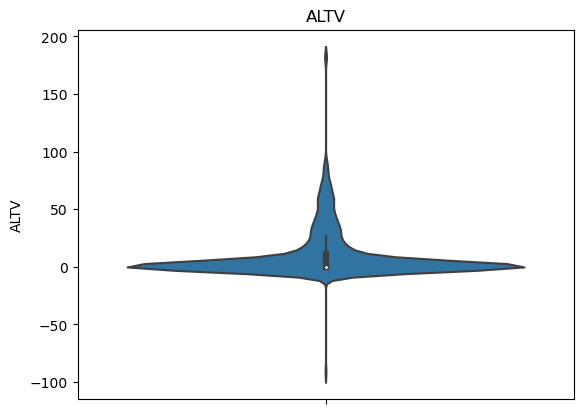

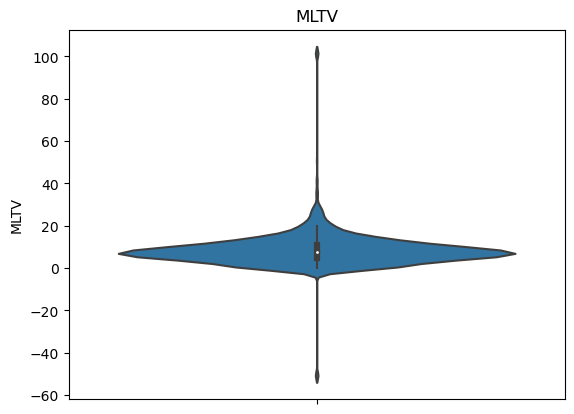

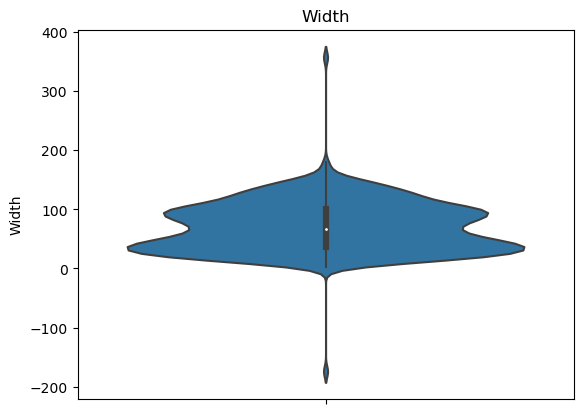

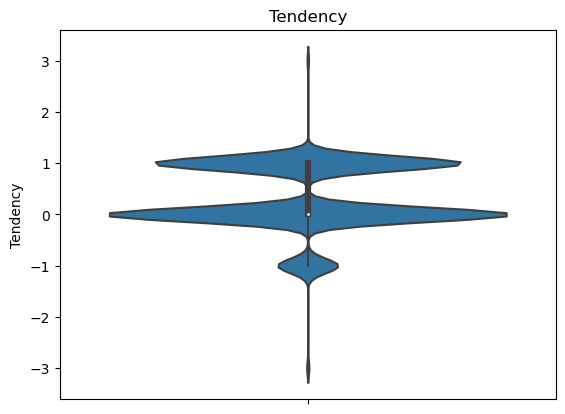

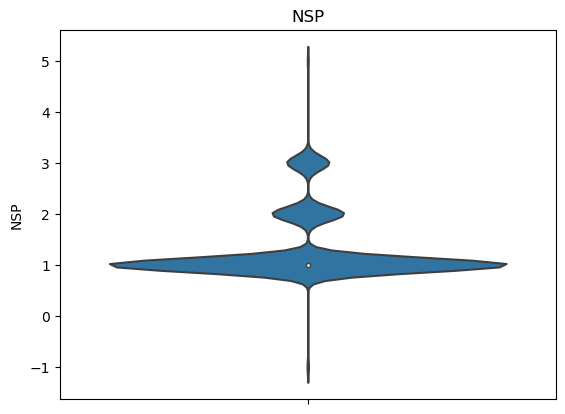

In [29]:
for feature in heart.columns :
    sns.violinplot(heart,y=feature)
    plt.title(feature)
    plt.show()